## Final Project Submission

Please fill out:
* Student name: LESLEY WANJIKU KAMAMO
* Student pace: PART TIME
* Scheduled project review date/time: 24TH JULY 2023
* Instructor name: STELLA WAITHERA
* Blog post URL:


## Overview

This project requires the use Explanatory Data Analyisis to generate insights
for Microsoft as our business stakeholder.
Microsoft sees all the big companies creating original video content and they want 
to get in on the fun. They have decided to create a 'new movie studio', but they don’t 
know anything about creating movies.

We'll be required to import, clean, combine, reshape and visualize the data provided to answer the questions and provide insights or recommendation to the Stakeholders.

 You are charged with exploring what types of films 
are currently doing the best at the box office. You must then translate those findings into
actionable insights that the head of Microsoft's new movie studio can use to help decide 
what type of films to create.

## Business Problem
This businees has decided to create a New Movie Studio. To do this, they need insight into the following:
1. What studios are frequently used for production
2. What type of films to create
3. What genres of films are being viewed frequently
4. What genres of films are bring the most return profit

### Business Understanding
The bussiness questions provided in this project are:
1. What type of films are currently doing the best at the Box Office
2. Transalate the findings of [1] to actionable insights that the the head of Microsoft's new movie studio can use to help decide what type of films to create


Questions to consider:

What are the business's pain points related to this project?
How did you pick the data analysis question(s) that you did?
Why are these questions important from a business perspective?

## Data Understanding

For this project, we will use the data under the file path `zippedData/...`. These files contain information about movies. They represent historical data on movies for recent past years, hence this data will be modified for the purpose of the analysis.

The data is contained in three separate CSV files:
1. `bom.movie_gross.csv`: each record represents a superhero, with attributes of that superhero (e.g. eye color). Height is measured in centimeters, and weight is measured in pounds.
2. `title.ratings.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power
2. `title.basics.csv`: each record represents a superpower, then has True/False values representing whether each superhero has that power

The features of interest for this analysis will be:
`movie_title`: The title (or AKA) of the Movie
`movie_rating`: The rating of the movie
`movie_type`: The genre of the movie

The data from this files as seen above represents various column findings. Such kind of findings will be available for the analyisis and insights into what to recommend to the Businees Stakeholders.




Questions to consider:

Where did the data come from, and how do they relate to the data analysis questions?
What do the data represent? Who is in the sample and what variables are included?
What is the target variable?
What are the properties of the variables you intend to use?

### Setup

In the cell below, we will:

* Import and alias `pandas` as `pd`
* Import and alias `numpy` as `np`
* Import and alias `seaborn` as `sns`
* Import and alias `matplotlib.pyplot` as `plt`
* Set Matplotlib visualizations to display inline in the notebook

In [49]:
#import all standard packages to be used in the project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline

### 1. Load the dataset from the csv files using Pandas

In the below cell,
##### Open Up the CSV files as a Dataframe

1. Load the dataset in `bom.movie_gross.csv` as `movies_df`
2. Load the data from the other two csv files:
               `title.basics.csv` as `basic_df`
               `title.rating.csv` as `rating_df`

   
We'll use `index_col=0` when opening the CSV because the index contains important information.

In [50]:
# load `bom.movie_gross.csv` as `movies_df`
movies_df = pd.read_csv('zippedData/bom.movie_gross.csv', index_col=0)

movies_df

,studio,domestic_gross,foreign_gross,year
title,,,,
Toy Story 3,BV,415000000.0,652000000,2010
Alice in Wonderland (2010),BV,334200000.0,691300000,2010
Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
Inception,WB,292600000.0,535700000,2010
Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...
The Quake,Magn.,6200.0,NaN,2018
Edward II (2018 re-release),FM,4800.0,NaN,2018
El Pacto,Sony,2500.0,NaN,2018


In [51]:
basics_df = pd.read_csv('zippedData/title.basics.csv', index_col=0)

basics_df

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...
tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy


In [52]:
ratings_df = pd.read_csv('zippedData/title.ratings.csv', index_col=0)

ratings_df

,averagerating,numvotes
tconst,,
tt10356526,8.3,31
tt10384606,8.9,559
tt1042974,6.4,20
tt1043726,4.2,50352
tt1060240,6.5,21
...,...,...
tt9805820,8.1,25
tt9844256,7.5,24
tt9851050,4.7,14


In [54]:

# more info on the movies_df dataframe
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3387 entries, Toy Story 3 to An Actor Prepares
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   studio          3382 non-null   object 
 1   domestic_gross  3359 non-null   float64
 2   foreign_gross   2037 non-null   object 
 3   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 132.3+ KB


In [55]:
# more info on the info_df dataframe
info_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220000 entries, 0 to 73855
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   tconst           220000 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  float64
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
 6   averagerating    73856 non-null   float64
 7   numvotes         73856 non-null   float64
dtypes: float64(4), object(4)
memory usage: 15.1+ MB


In [56]:
basics_df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146144 entries, tt0063540 to tt9916754
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   primary_title    146144 non-null  object 
 1   original_title   146123 non-null  object 
 2   start_year       146144 non-null  int64  
 3   runtime_minutes  114405 non-null  float64
 4   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 6.7+ MB


In [66]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73856 entries, tt10356526 to tt9894098
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   averagerating  73856 non-null  float64
 1   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 1.7+ MB


## Data Preparation

Describe and justify the process for preparing the data for analysis.

Questions to consider:

Were there variables you dropped or created?
How did you address missing values or outliers?
Why are these choices appropriate given the data and the business problem?

### Data Cleaning
##### 1.1 Identify and Handling missing values

As we can see from the `movie_df` dataset, the columns with missing values include:
1. `studio`
2. `domestic_gross`
3. `foreign_gross`



In [57]:
missing_studio_sample = movies_df[movies_df[["studio", "domestic_gross", "foreign_gross"]].isna()].sample(
    5, random_state=1
)
missing_studio_sample

,studio,domestic_gross,foreign_gross,year
title,,,,
Ladrones,NaN,NaN,NaN,NaN
The Lady in the Car with Glasses and a Gun,NaN,NaN,NaN,NaN
Southside with You,NaN,NaN,NaN,NaN
Fun Size,NaN,NaN,NaN,NaN
Batti Gul Meter Chalu,NaN,NaN,NaN,NaN


##### 2. Dropping the missing values

From the data above, The Studio column is the most relevant column for this model,
Hence, missing values present in the studio column need to be dropped.
There's no default value for studio hence replacing the missing values with any other studio name,
is not sensible.

In [58]:
movies_df.dropna(subset=["studio"], inplace=True)

movies_df["studio"].isna().sum()

0

#### 3. Identifying and Handling text data

This involves identifying the minor issues and correcting them brought about by
the overall natural language processing. Here we';; be using the studio column as our base

In [59]:
movies_df["studio"].value_counts()

IFC             166
Uni.            147
WB              140
Magn.           136
Fox             136
               ... 
Conglomerate      1
UTMW              1
CLF               1
JS                1
ALP               1
Name: studio, Length: 257, dtype: int64

##### 2.1 Identify and Handling missing values

As we can see from the `basics_df` dataset, the columns with missing values include:
1. `original_title`
2. `runtime_minutes`
3. `genres`


In [63]:
missing_genre_sample = basics_df[basics_df[[ "genres"]].isna()].sample(
    5, random_state=1
)
missing_genre_sample

,primary_title,original_title,start_year,runtime_minutes,genres
tconst,,,,,
tt2892012,NaN,NaN,NaN,NaN,NaN
tt2157680,NaN,NaN,NaN,NaN,NaN
tt7159010,NaN,NaN,NaN,NaN,NaN
tt6315088,NaN,NaN,NaN,NaN,NaN
tt7812438,NaN,NaN,NaN,NaN,NaN


In [64]:
# Drop all rows with missing values for the genres column
basics_df.dropna(subset=["genres"], inplace=True)

basics_df["genres"].isna().sum()

0

#### 2.3 Identifying and Handling text data

This involves identifying the minor issues and correcting them brought about by
the overall natural language processing. Here we'll be using the genre column as our base

In [65]:
basics_df['genres'].value_counts()

Documentary                    32185
Drama                          21486
Comedy                          9177
Horror                          4372
Comedy,Drama                    3519
                               ...  
Adventure,Comedy,Reality-TV        1
Horror,Music,Mystery               1
Mystery,Thriller,War               1
Documentary,News,Sci-Fi            1
Comedy,Documentary,Western         1
Name: genres, Length: 1085, dtype: int64

* Values for the genres are sensible enough for data modelling *

##### 3.1 Identify and Handling missing values

As we can see from the `ratings_df` dataset, all columns are without missing values.

 ## Joining Dataframes together
 
 * We will need to combine the two title csv files into one, to have a consolidated dataset to analysis through.

Instanstiate a variable `data_files` to save the file path of `title.basics.csv` and `title.ratings.csv` csv files.

Since both CSV files have a common column-header, `tconst`, we'll concat the two CSV files. We will do this by using the `pd.concat` function for the two data sets. After which we will read the csv file using the `pd.read_csv` function.


In [ ]:
# load the other two csv files as `info_df`
data_files = ["zippedData/title.basics.csv", "zippedData/title.ratings.csv"]
info_df = pd.concat(pd.read_csv(files) for files in data_files)

info_df

* We are able to join this two tables by the use of the .merge() function since we have a common column for both.
ie tconst column

* We'll use the Inner join so as to find matching or only values common to both tables

In the cell below, we have created a new dataframe called `basics_and_ratings_df` that contains the joined data.

In [67]:
basics_and_ratings_df = basics_df.merge(ratings_df, on="tconst",how='inner')
basics_and_ratings_df

,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
tconst,,,,,,,
tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119
...,...,...,...,...,...,...,...
tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5
tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6
tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136


Group data by genre - model in graph top genres
Rating ? highest rating movie
Relate the rating and runtime_minutes

## Data Modelling

Describe and justify the process for analyzing or modeling the data.

Questions to consider:

How did you analyze or model the data?
How did you iterate on your initial approach to make it better?
Why are these choices appropriate given the data and the business problem?

This is to answer the question on *What is the distribution of the movies by studio?*

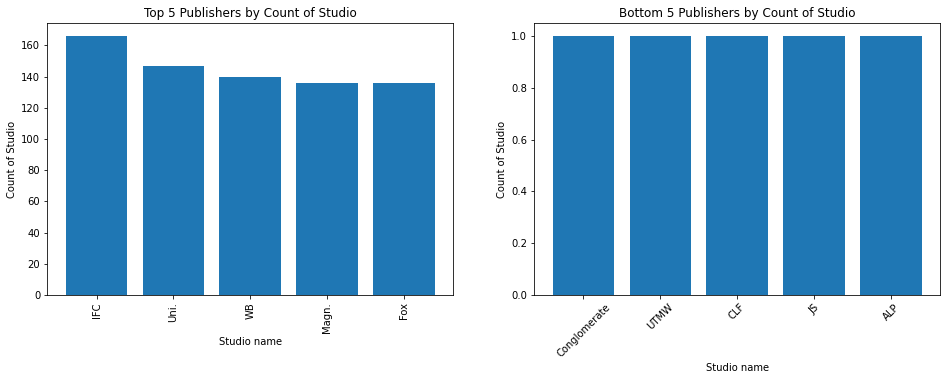

In [60]:
# plot graphs/models for the above dataset

# Set up plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))

# Create variables for easier reuse
value_counts = movies_df["studio"].value_counts()
top_5_counts = value_counts.iloc[:5]
bottom_5_counts = value_counts.iloc[-5:]

# Plot data
ax1.bar(top_5_counts.index, top_5_counts.values)
ax2.bar(bottom_5_counts.index, bottom_5_counts.values)

# Customize appearance
ax1.tick_params(axis="x", labelrotation=90)
ax2.tick_params(axis="x", labelrotation=45)
ax1.set_xlabel("Studio name")
ax2.set_xlabel("Studio name")
ax1.set_ylabel("Count of Studio")
ax2.set_ylabel("Count of Studio")
ax1.set_title("Top 5 Publishers by Count of Studio")
ax2.set_title("Bottom 5 Publishers by Count of Studio");

## Evaluation

Evaluate how well your work solves the stated business problem.

Questions to consider:

How do you interpret the results?
How well does your model fit your data? How much better is this than your baseline model?
How confident are you that your results would generalize beyond the data you have?
How confident are you that this model would benefit the business if put into use?


## Summary

Provide your conclusions about the work you've done, including any limitations or next steps.

Questions to consider:

What would you recommend the business do as a result of this work?
What are some reasons why your analysis might not fully solve the business problem?
What else could you do in the future to improve this project?
